# Unsupervised Clustering on a heart failiur dataset: a BMI500 class project

### Sina Dabiri
### sdabiri@emory.edu

#### Version 1.0

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# For this clustering project, the scikit learn PCA is going to be used from the decomposition library.
from sklearn import decomposition

In [6]:
"""
The heart dataset's CSV has been put in the project folder. The source of this dataset is: 

Dataset from Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure 
                                             from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020)
""" 
heart_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
heart_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Divide the dataset into it's features and it's true label, X and Y.

In [46]:
# Setting the X feature and inspecting it
X = heart_df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [47]:
# Setting the true label Y vector
Y =  heart_df['DEATH_EVENT']
Y


0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [57]:
# Principal Component Analysis (PCA): dimentionally reducing the data to two principal components that discribe most of the variation. Fitting the X dataframe using PCA.
pca = decomposition.PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [54]:
# Printing out the two highest variances.
print(pca.explained_variance_)


[9.56566931e+09 9.40896938e+05]


In [59]:
# Transforming the X dataframe to the coordinate of the two principal components (PC1, PC2).
X_reduced = pca.fit_transform(X)
X_reduced.shape

(299, 2)

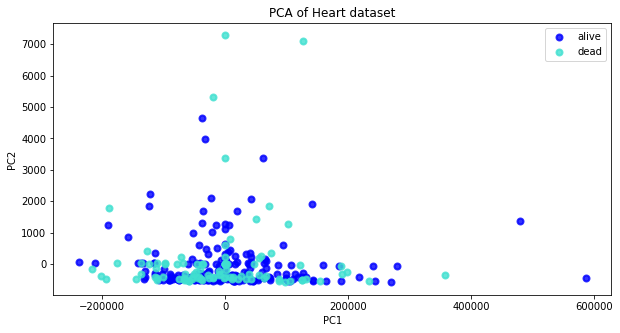

In [61]:
# Scatter plotting the two classes of Alive/Dead on the PC1 and PC2
plt.figure(figsize=(10,5))
colors = ['blue', 'turquoise']
target_names = ['alive', 'dead']
lw = 2
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_reduced[Y == i, 0], X_reduced[Y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Heart dataset');